In [1]:
import numpy as np
import pickle

from scipy.stats import spearmanr
import itertools

import seaborn as sns
import matplotlib.pyplot as plt

# load explanations

In [2]:
#load explanations

#lime
method='lime'
model_names = ['logistic', 'gb', 'rf', 'nn', 'nn_logistic']
n=3000

filenames = {m: f'explanations/expl_{method}_{m}_n{n}.pkl' for m in model_names}
attr_lime = {m: pickle.load(open(filenames[m], 'rb')) for m in model_names}


#kernelshap
method='kernelshap'
model_names = ['logistic', 'gb', 'rf', 'nn', 'nn_logistic']

filenames = {m: f'explanations/expl_{method}_{m}.pkl' for m in model_names}
attr_kernelshap = {m: pickle.load(open(filenames[m], 'rb')) for m in model_names}


#vanillagrad
method='vanillagrad'
model_names = ['nn', 'nn_logistic']

filenames = {m: f'explanations/expl_{method}_{m}.pkl' for m in model_names}
attr_vanillagrad = {m: pickle.load(open(filenames[m], 'rb')) for m in model_names}


#gradient*input
method='gradtinput'
model_names = ['nn', 'nn_logistic']

filenames = {m: f'explanations/expl_{method}_{m}.pkl' for m in model_names}
attr_gradtinput = {m: pickle.load(open(filenames[m], 'rb')) for m in model_names}


#integrated gradients
method='integratedgrad'
model_names = ['nn', 'nn_logistic']
n=1500

filenames = {m: f'explanations/expl_{method}_{m}_n{n}.pkl' for m in model_names}
attr_integratedgrad = {m: pickle.load(open(filenames[m], 'rb')) for m in model_names}


#smoothgrad
method='smoothgrad'
model_names = ['nn', 'nn_logistic']
n=1500

filenames = {m: f'explanations/expl_{method}_{m}_n{n}.pkl' for m in model_names}
attr_smoothgrad = {m: pickle.load(open(filenames[m], 'rb')) for m in model_names}


# calculate rank correlations + plot

In [3]:
def calc_rank_corr_two_methods(attr1, attr2, k):
    '''
    attr1: np.array, n x p
    attr2: np.array, n x p
    '''
    #calculate feature ranks, top k features
    ranks1 = np.argsort(-np.abs(attr1), axis=1)[:, 0:k]
    ranks2 = np.argsort(-np.abs(attr2), axis=1)[:, 0:k]

    #calculate rank correlation for each data point
    #https://stackoverflow.com/questions/44947030/how-to-get-scipy-stats-spearmanra-b-compute-correlation-only-between-variable
    corrs = []
    for row in range(ranks1.shape[0]):
        rho, _ = spearmanr(ranks1[row, :], ranks2[row, :])
        corrs.append(rho)
        
    return np.array(corrs) #rank correlations for each datapoint




In [4]:
def calc_rank_corr_all_methods(expl_methods_names, expl_methods_attrs, k):
    
    #initiate correlation matrix
    num_expl_methods = len(expl_methods_attrs)
    corr_matrix = np.zeros([num_expl_methods, num_expl_methods])
    
    #fill correlation matrix with average rank correlation
    for a, b in itertools.combinations_with_replacement(range(num_expl_methods), 2):
        print(f'calculating {expl_methods_names[a]} ({a}) and {expl_methods_names[b]} ({b})')
        corrs = calc_rank_corr_two_methods(expl_methods_attrs[a], expl_methods_attrs[b], k) #rank correlations for each datapoint
        corr_matrix[a, b] = np.mean(corrs) #average rank correlation
        corr_matrix[b, a] = corr_matrix[a, b]
        
    return corr_matrix
    
    

In [5]:
def plot_corr_matrix(corr_matrix, plot_path, 
                     labels=['LIME', 'KernelSHAP', 'Grad', 'Grad*Input', 'IntGrad', 'SmoothGRAD']):
    mask = np.invert(np.tril(np.ones_like(corr_matrix, dtype=bool))) #mask for upper triangle
    cmap = sns.color_palette('vlag', as_cmap=True) #diverging colormap
    
    #heatmap
    plt.figure(figsize=(15, 7))
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, 
                vmin=-1, vmax=1, center=0,
                xticklabels=labels, yticklabels=labels,
                square=True, linewidths=.5, cbar_kws={'shrink': 0.995})
    plt.yticks(rotation=0)
    plt.savefig(plot_path, facecolor='white', transparent=False)

In [6]:
#combine both functions
def rank_correlation_analysis(expl_methods_names, expl_methods_attrs, k, plot_path, 
                              labels=['LIME', 'KernelSHAP', 'Grad', 'Grad*Input', 'IntGrad', 'SmoothGRAD']):
    corr_matrix = calc_rank_corr_all_methods(expl_methods_names, expl_methods_attrs, k)
    plot_corr_matrix(corr_matrix, plot_path, labels)
    
    return corr_matrix

# results, evaluate all k's

### NN + logistic

----------- calculating rank correlation for nn, k=2
calculating LIME (0) and LIME (0)
calculating LIME (0) and KernelSHAP (1)
calculating LIME (0) and Grad (2)
calculating LIME (0) and Grad*Input (3)
calculating LIME (0) and IntGrad (4)
calculating LIME (0) and SmoothGRAD (5)
calculating KernelSHAP (1) and KernelSHAP (1)
calculating KernelSHAP (1) and Grad (2)
calculating KernelSHAP (1) and Grad*Input (3)
calculating KernelSHAP (1) and IntGrad (4)
calculating KernelSHAP (1) and SmoothGRAD (5)
calculating Grad (2) and Grad (2)
calculating Grad (2) and Grad*Input (3)
calculating Grad (2) and IntGrad (4)
calculating Grad (2) and SmoothGRAD (5)
calculating Grad*Input (3) and Grad*Input (3)
calculating Grad*Input (3) and IntGrad (4)
calculating Grad*Input (3) and SmoothGRAD (5)
calculating IntGrad (4) and IntGrad (4)
calculating IntGrad (4) and SmoothGRAD (5)
calculating SmoothGRAD (5) and SmoothGRAD (5)
[[1.         0.22402159 0.72874494 0.96221323 0.9608637  0.97840756]
 [0.22402159 1.  

calculating LIME (0) and Grad (2)
calculating LIME (0) and Grad*Input (3)
calculating LIME (0) and IntGrad (4)
calculating LIME (0) and SmoothGRAD (5)
calculating KernelSHAP (1) and KernelSHAP (1)
calculating KernelSHAP (1) and Grad (2)
calculating KernelSHAP (1) and Grad*Input (3)
calculating KernelSHAP (1) and IntGrad (4)
calculating KernelSHAP (1) and SmoothGRAD (5)
calculating Grad (2) and Grad (2)
calculating Grad (2) and Grad*Input (3)
calculating Grad (2) and IntGrad (4)
calculating Grad (2) and SmoothGRAD (5)
calculating Grad*Input (3) and Grad*Input (3)
calculating Grad*Input (3) and IntGrad (4)
calculating Grad*Input (3) and SmoothGRAD (5)
calculating IntGrad (4) and IntGrad (4)
calculating IntGrad (4) and SmoothGRAD (5)
calculating SmoothGRAD (5) and SmoothGRAD (5)
[[1.         0.15789474 1.         0.96221323 0.96221323 1.        ]
 [0.15789474 1.         0.15789474 0.19568151 0.19568151 0.15789474]
 [1.         0.15789474 1.         0.96221323 0.96221323 1.        ]
 [0.96

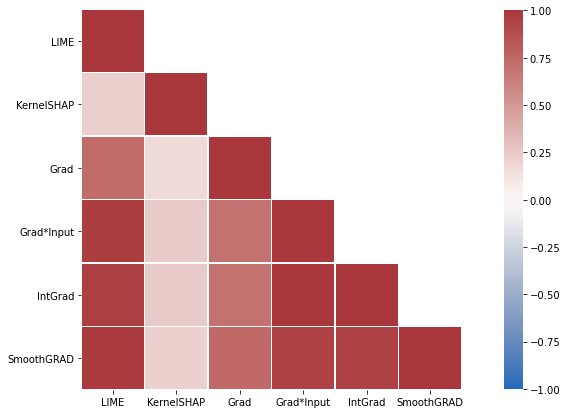

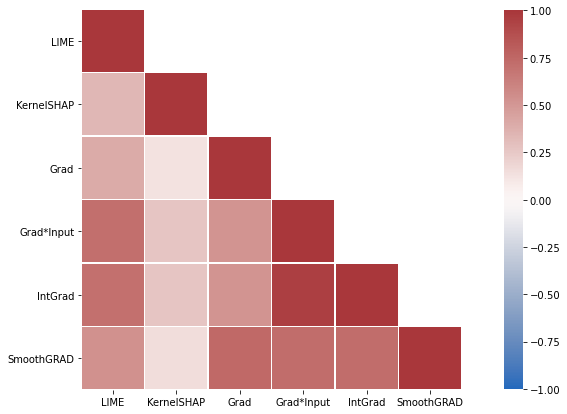

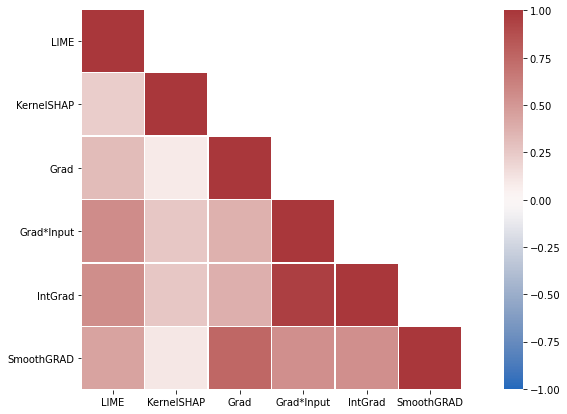

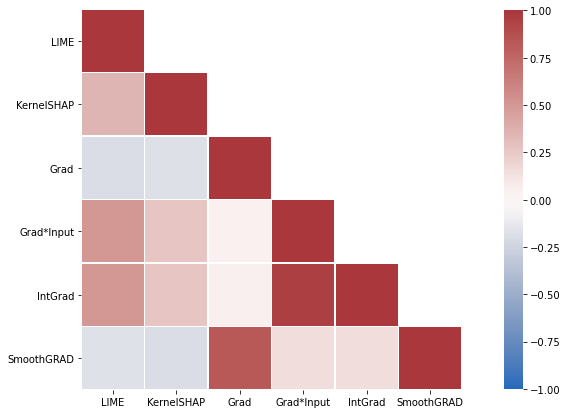

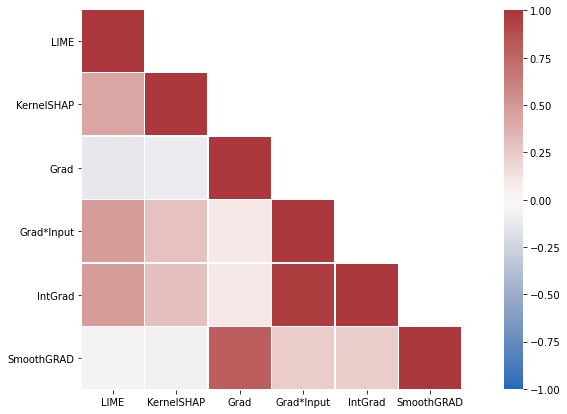

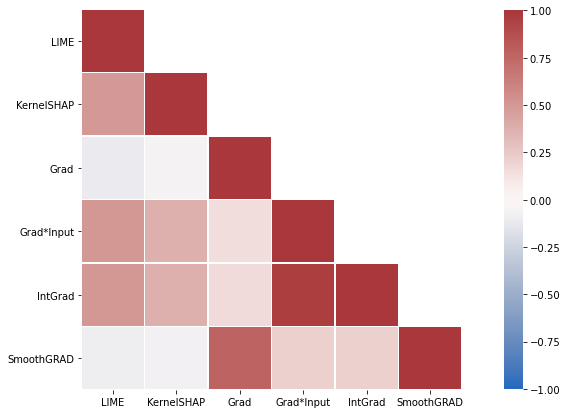

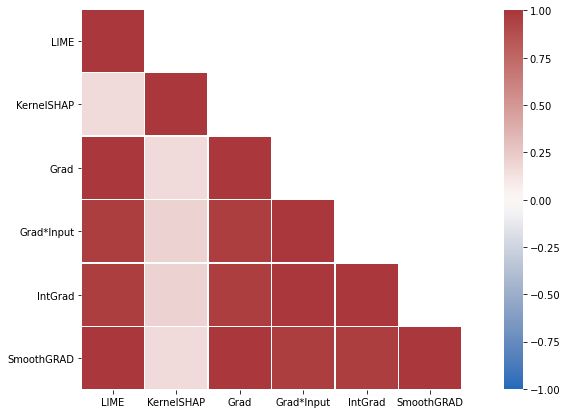

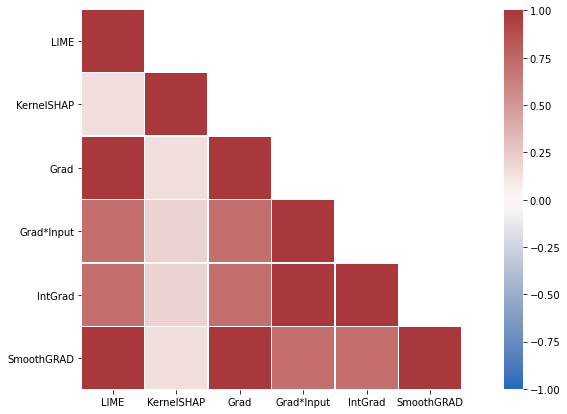

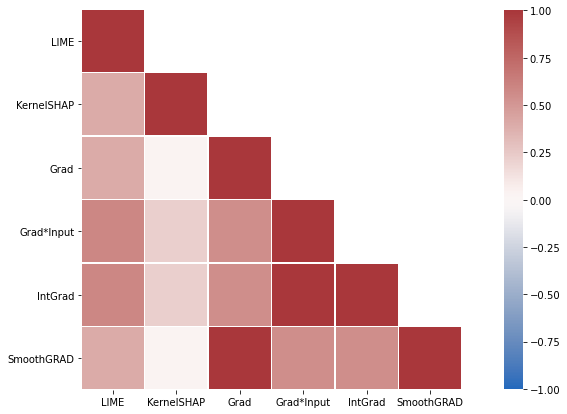

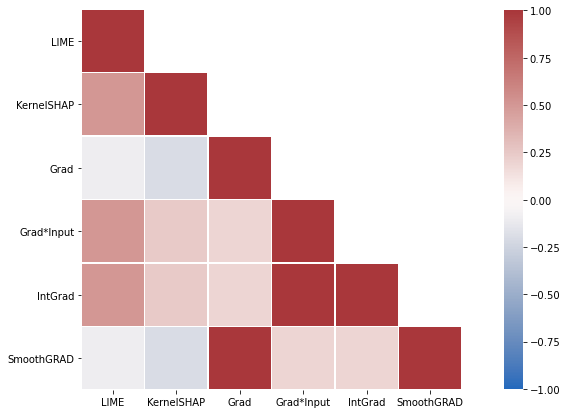

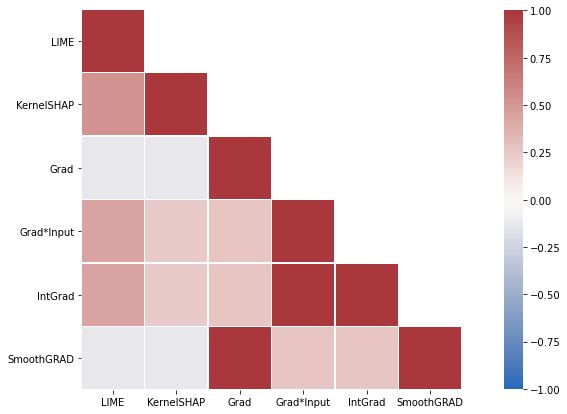

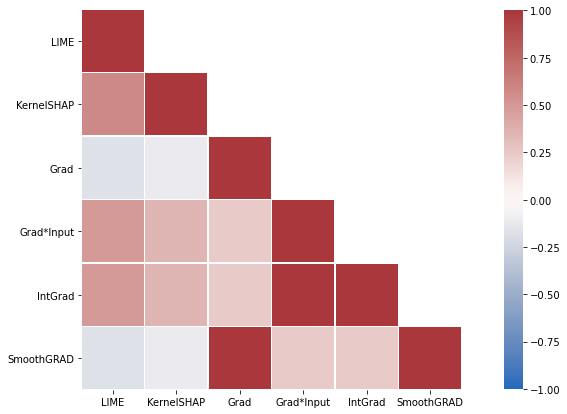

In [7]:
expl_methods_names = {0: 'LIME',
                1: 'KernelSHAP', 
                2: 'Grad',
                3: 'Grad*Input',
                4: 'IntGrad',
                5: 'SmoothGRAD'}
max_k=7

for m in ['nn', 'nn_logistic']:
    expl_methods_attrs = {0: attr_lime[m],
                          1: attr_kernelshap[m], 
                          2: attr_vanillagrad[m],
                          3: attr_gradtinput[m],
                          4: attr_integratedgrad[m],
                          5: attr_smoothgrad[m]}
    for k_i in range(2, max_k+1):
        print(f'----------- calculating rank correlation for {m}, k={k_i}')
        plot_path=f'figures/rank_corr_{m}_k{k_i}.png'
        corr_matrix = rank_correlation_analysis(expl_methods_names, expl_methods_attrs, k=k_i, plot_path=plot_path)
        print(corr_matrix)

### RF + GB

----------- calculating rank correlation for rf, k=2
calculating LIME (0) and LIME (0)
calculating LIME (0) and KernelSHAP (1)
calculating KernelSHAP (1) and KernelSHAP (1)
[[1.         0.02968961]
 [0.02968961 1.        ]]
----------- calculating rank correlation for rf, k=3
calculating LIME (0) and LIME (0)
calculating LIME (0) and KernelSHAP (1)
calculating KernelSHAP (1) and KernelSHAP (1)
[[1.         0.11707152]
 [0.11707152 1.        ]]
----------- calculating rank correlation for rf, k=4
calculating LIME (0) and LIME (0)
calculating LIME (0) and KernelSHAP (1)
calculating KernelSHAP (1) and KernelSHAP (1)
[[1.         0.14210526]
 [0.14210526 1.        ]]
----------- calculating rank correlation for rf, k=5
calculating LIME (0) and LIME (0)
calculating LIME (0) and KernelSHAP (1)
calculating KernelSHAP (1) and KernelSHAP (1)
[[1.         0.17334683]
 [0.17334683 1.        ]]
----------- calculating rank correlation for rf, k=6
calculating LIME (0) and LIME (0)
calculating LIME 

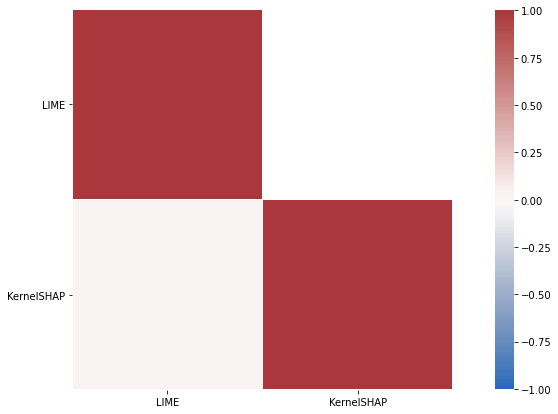

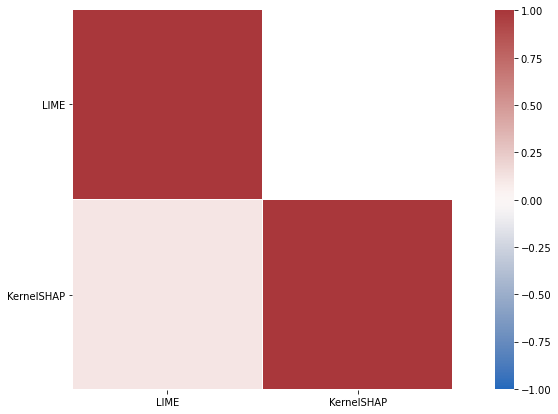

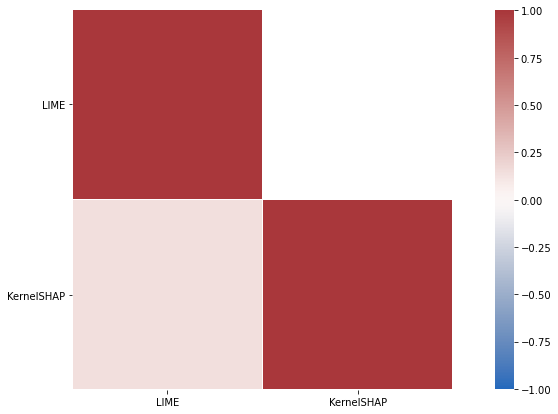

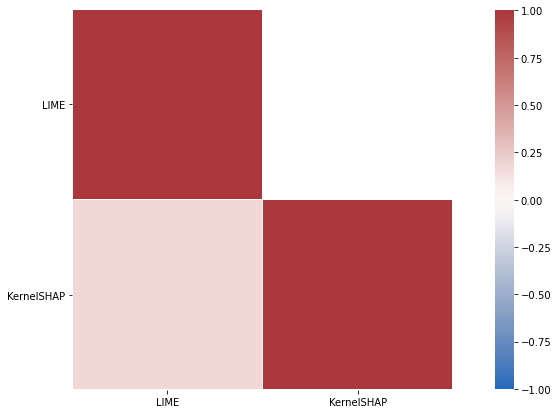

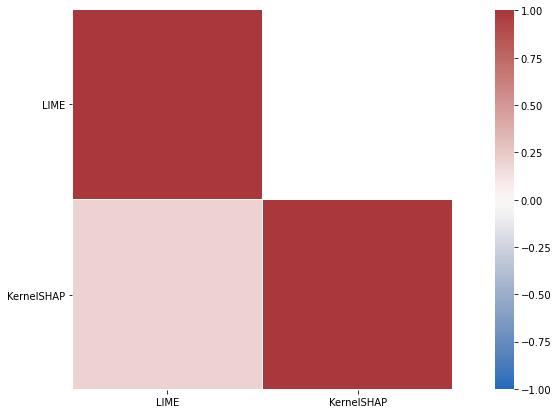

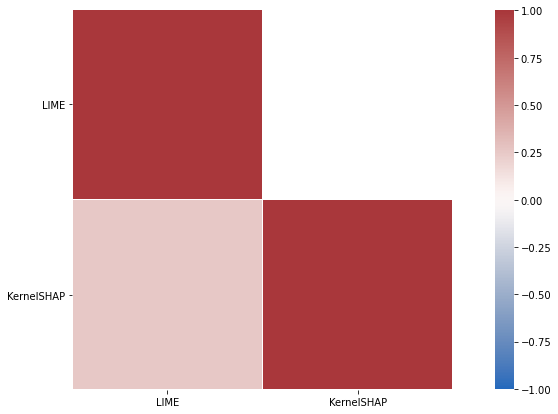

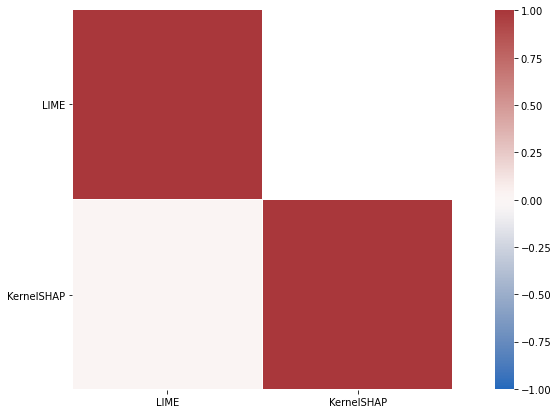

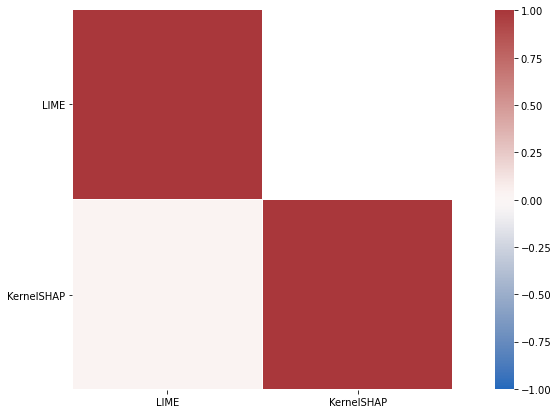

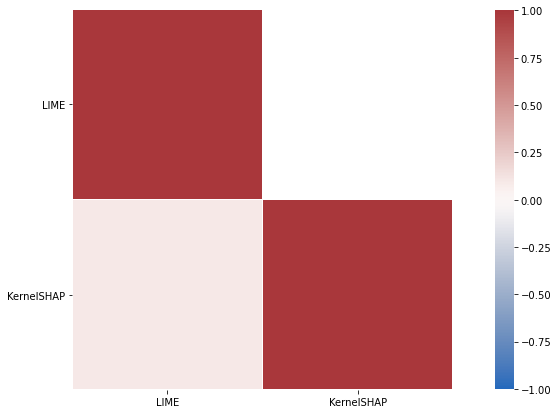

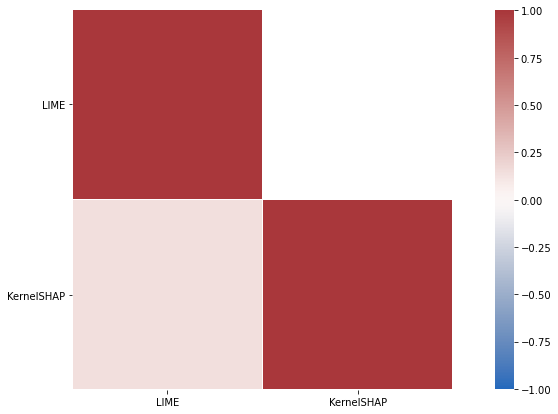

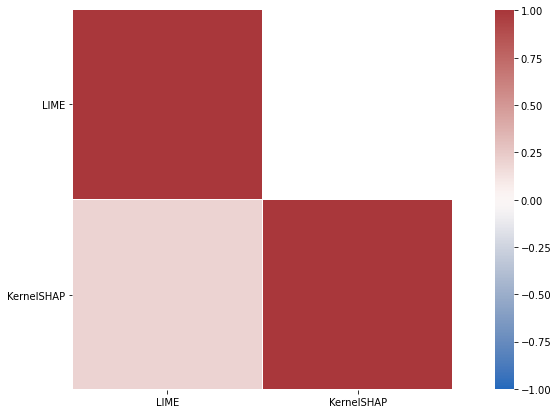

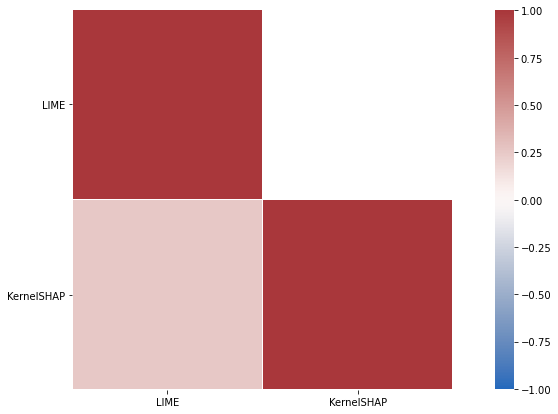

In [8]:
expl_methods_names = {0: 'LIME',
                1: 'KernelSHAP'}
max_k=7


for m in ['rf', 'gb']:
    expl_methods_attrs = {0: attr_lime[m],
                          1: attr_kernelshap[m]}
    for k_i in range(2, max_k+1):
        print(f'----------- calculating rank correlation for {m}, k={k_i}')
        plot_path=f'figures/rank_corr_{m}_k{k_i}.png'
        corr_matrix = rank_correlation_analysis(expl_methods_names, expl_methods_attrs, k=k_i, 
                                              plot_path=plot_path, labels=['LIME', 'KernelSHAP'])
        print(corr_matrix)